In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv', header =None)
df.columns =['Id number', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium',
            'Barium', 'Iron', 'Type of glass']

In [3]:
df.sample (n=10)

,Id number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
171,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.0,0.00,5
159,160,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
97,98,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.0,0.24,2
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
118,119,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.0,0.29,2
157,158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3
173,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.0,0.00,5
87,88,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.0,0.10,2
49,50,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.0,0.00,1


In [4]:
df.describe()

,Id number,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.dtypes

Id number             int64
Refractive Index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type of glass         int64
dtype: object

In [6]:
for i in df:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
209    210
210    211
211    212
212    213
213    214
Name: Id number, Length: 214, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: Refractive Index, Length: 214, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Sodium, Length: 214, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Magnesium, Length: 214, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      1.10
1      1.36
2      1.

In [7]:
df.isnull().sum()

Id number           0
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type of glass       0
dtype: int64

__Dataset has no null values__

In [8]:
df['Type of glass'].value_counts()

Type of glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

__We found imbalance in label. We will fix it later__

In [9]:
# Dropping columns "Id number", as it just a serial number
df.drop(columns =['Id number'], inplace =True)

In [10]:
# Checking dataset after deleting id number
df.head(10)

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


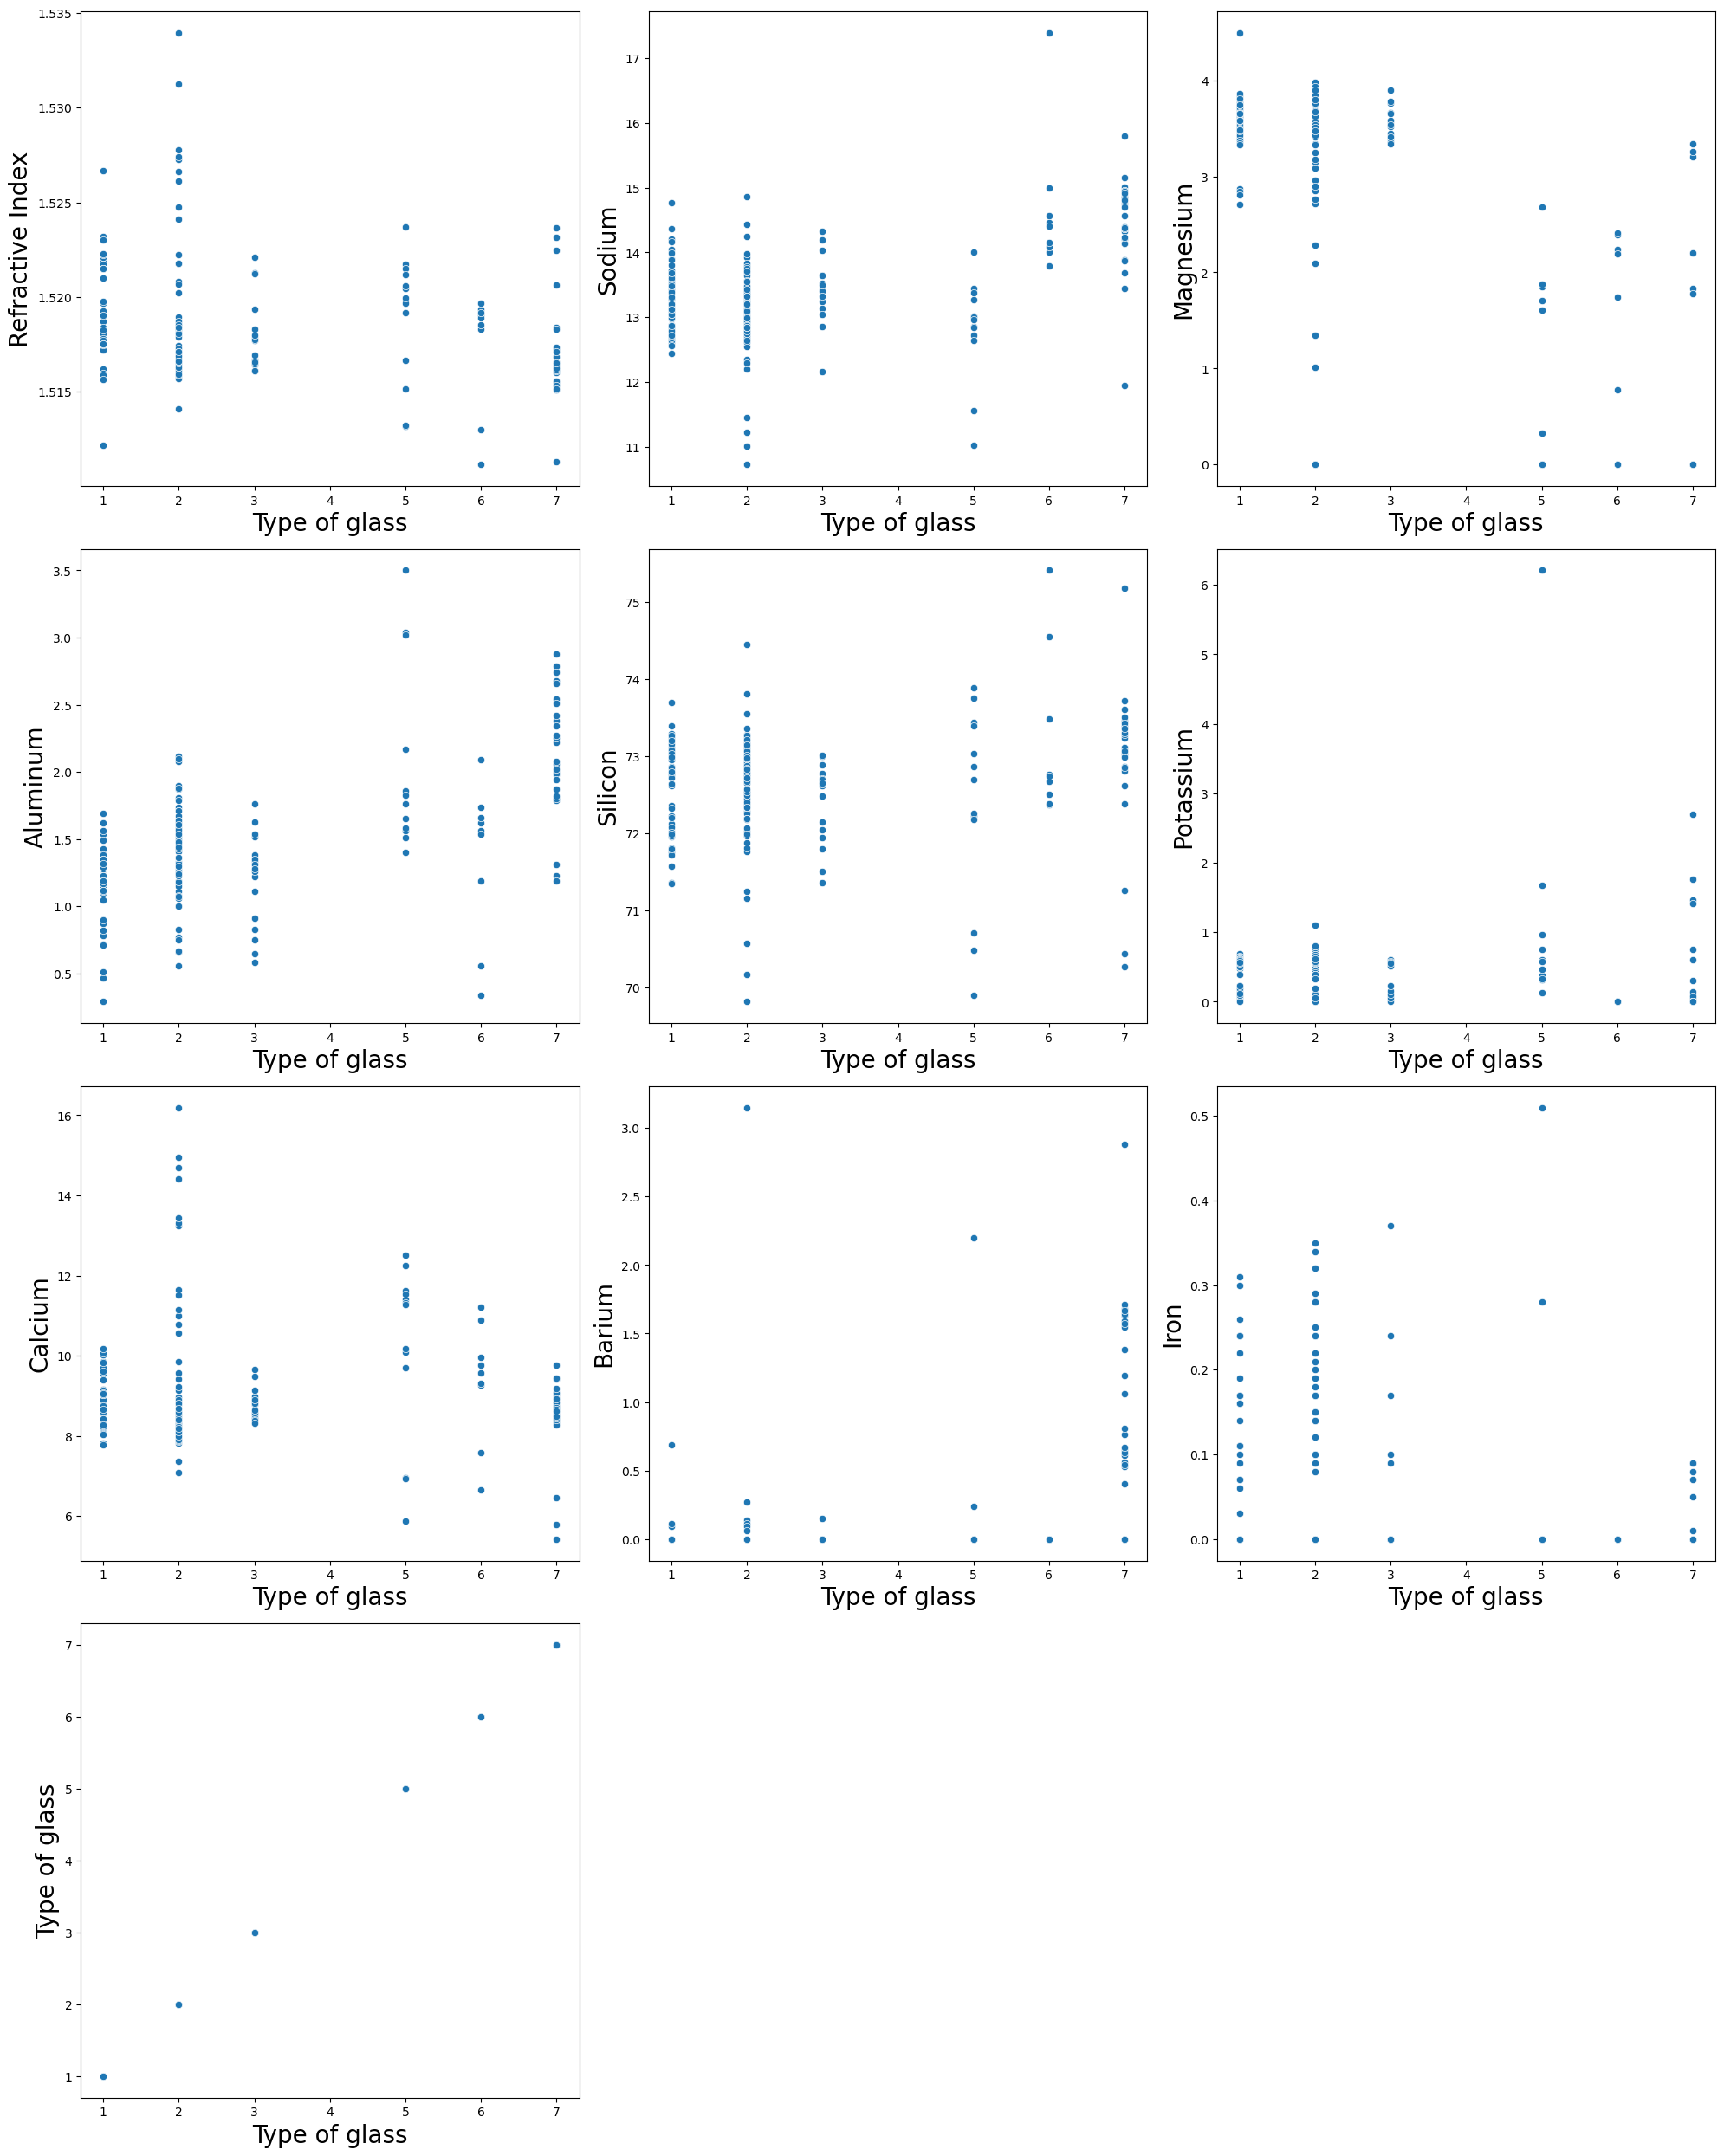

In [11]:
# Creating scatter plot to check relation with features and labels
plt.figure(figsize =(20,25))
plotnumber =1

for column in df:
    if plotnumber <=10:
        plt.subplot(4, 3, plotnumber)
        sns.scatterplot(x ='Type of glass', y =column, data =df)
        plt.xlabel('Type of glass', fontsize =20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()

__It seems all the features are correlated with label.__ 

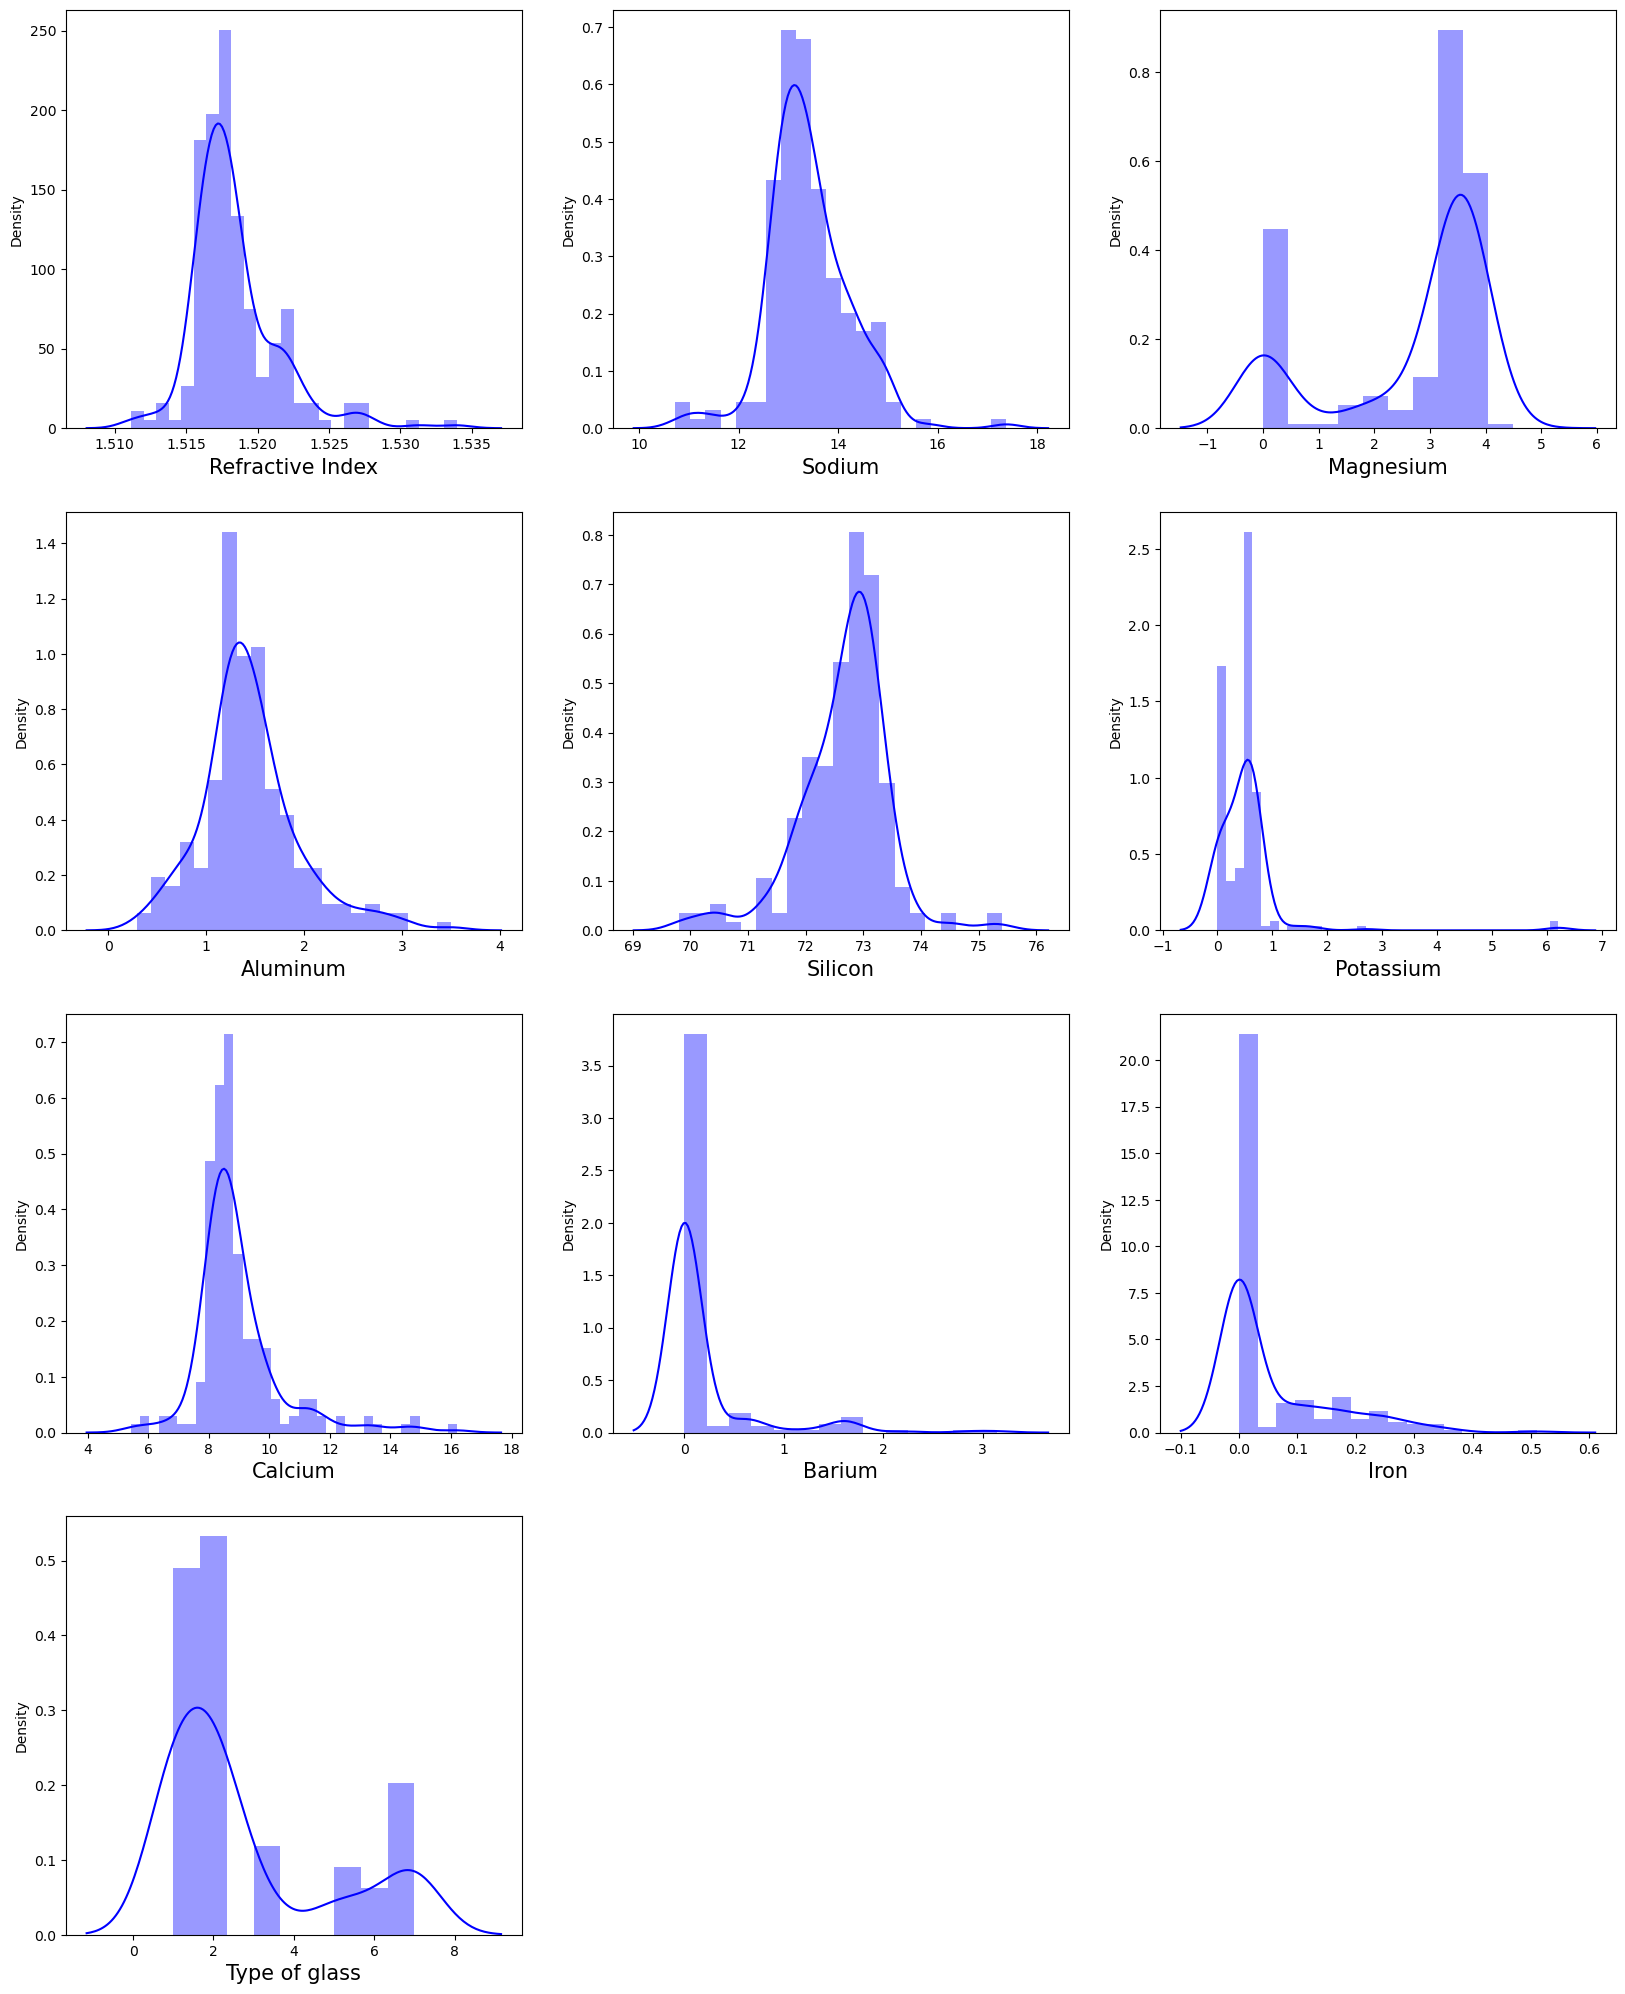

In [12]:
# Plotting distplot to see distribution of numbers
plt.figure(figsize =(20,25), facecolor ='white')
plotnumber =1

for column in df:
    if plotnumber <=10:
        plt.subplot(4,3, plotnumber)
        sns.distplot(df[column], color ='b')
        plt.xlabel(column, fontsize =15)
    plotnumber+=1
plt.show()

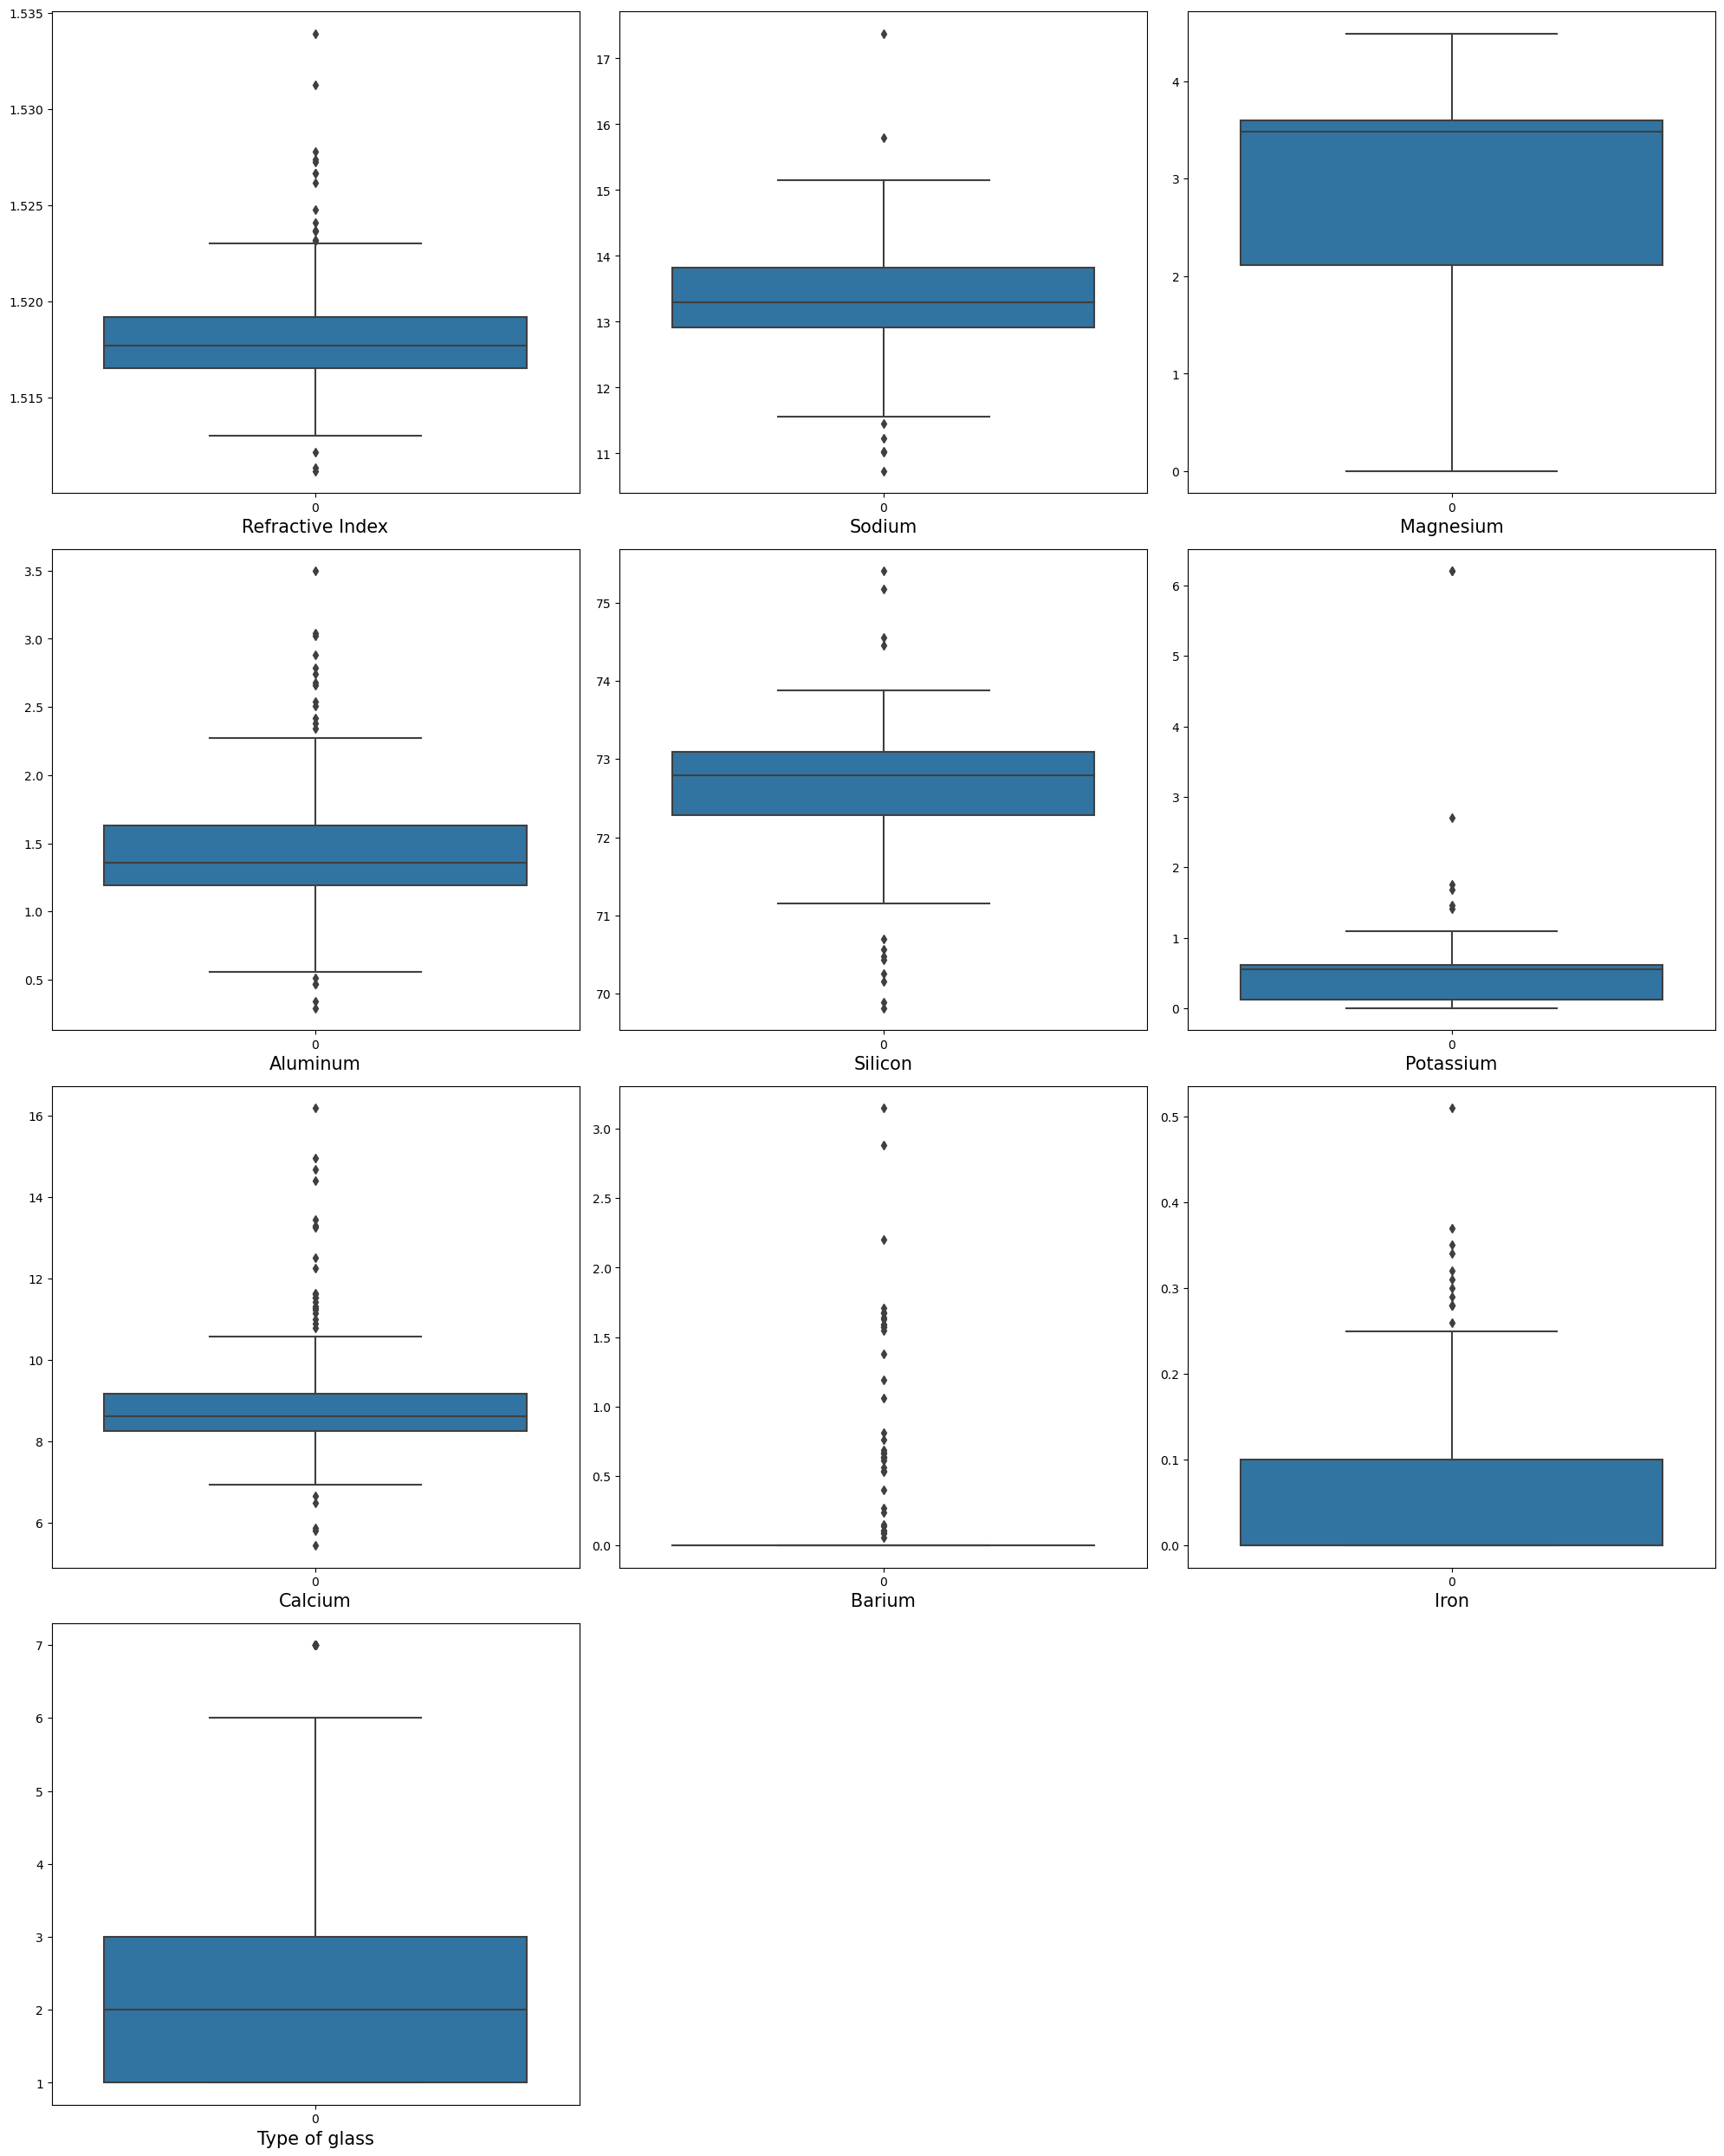

In [13]:
#Check outliers using boxplot
plt.figure(figsize =(20,25))
plotnumber =1

for column in df:
    if plotnumber <=10:
        plt.subplot(4,3, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize =15)
    plotnumber+=1
plt.tight_layout()

__Outliers are found in column 'Refractive Index', 'Sodium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron'__

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type of glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
# Removing outliers using IQR method

# Creating dataframe with columns having outliers
iqr_df =df[['Refractive Index', 'Sodium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']]
iqr_df

,Refractive Index,Sodium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,1.94,73.61,0.00,8.48,1.57,0.0


In [16]:
# Removing outlier using IQR
Q1 =iqr_df.quantile(0.25)
Q3 =iqr_df.quantile(0.75)

IQR =Q3-Q1

# Removing outliers from higher side
for i in iqr_df:
    high_iqr = Q3[i] +(IQR[i] * 1.5)
    high_index =np.where(iqr_df[i] > high_iqr)
    iqr_df =iqr_df.drop(iqr_df.index[high_index])
                        
# Removing outlier from lower side
for i in iqr_df:
    low_iqr =Q1[i] - (1.5 * IQR[i])
    low_index =np.where(iqr_df[i] < low_iqr)
    iqr_df =iqr_df.drop(iqr_df.index[low_index])

In [17]:
iqr_df.shape

(136, 8)

In [18]:
# Removing IQR using zscore

# Create new data for zscore
z_df =df[['Refractive Index', 'Sodium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']]
z =np.abs(zscore(z_df))
z_df =z_df[(z < 3).all(axis =1)]
z_df.shape

(194, 8)

In [19]:
# Checking data loss after removing outliers using IQR and zscore method

print("No. of records in original dataset", df.shape[0])

print("No. of records in dataset after using IQR", iqr_df.shape[0])
print("Data loss using IQR method", ((df.shape[0] - iqr_df.shape[0])/df.shape[0])*100)

print("No. of records in dataset after using Zscore", z_df.shape[0])
print("Data loss using IQR method", ((df.shape[0] - z_df.shape[0])/df.shape[0])*100)

No. of records in original dataset 214
No. of records in dataset after using IQR 136
Data loss using IQR method 36.44859813084112
No. of records in dataset after using Zscore 194
Data loss using IQR method 9.345794392523365


__We will use zscore to remove outliers as data loss in zscore as compared to IQR method__

In [20]:
z =np.abs(zscore(df))
df =df[(z < 3).all(axis =1)]
df.shape[0]

194

In [21]:
df.reset_index()

,index,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
189,208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
190,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
191,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
192,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [22]:
# Checking skewness in the dataset
df.skew()

Refractive Index    0.952733
Sodium              0.371482
Magnesium          -1.528849
Aluminum            0.658259
Silicon            -0.425450
Potassium           0.303175
Calcium             1.077962
Barium              3.188587
Iron                1.486479
Type of glass       1.284007
dtype: float64

In [23]:
# Removing Skewness
df['Refractive Index'] =np.cbrt(df['Refractive Index'])
df['Aluminum'] =np.cbrt(df['Aluminum'])
df['Calcium'] =np.cbrt(df['Calcium'])
df['Barium'] =np.cbrt(df['Barium'])
df['Iron'] =np.cbrt(df['Iron'])

In [24]:
# Again checking skewness
df.skew()

Refractive Index    0.948045
Sodium              0.371482
Magnesium          -1.528849
Aluminum           -0.374978
Silicon            -0.425450
Potassium           0.303175
Calcium             0.611914
Barium              2.207594
Iron                0.883166
Type of glass       1.284007
dtype: float64

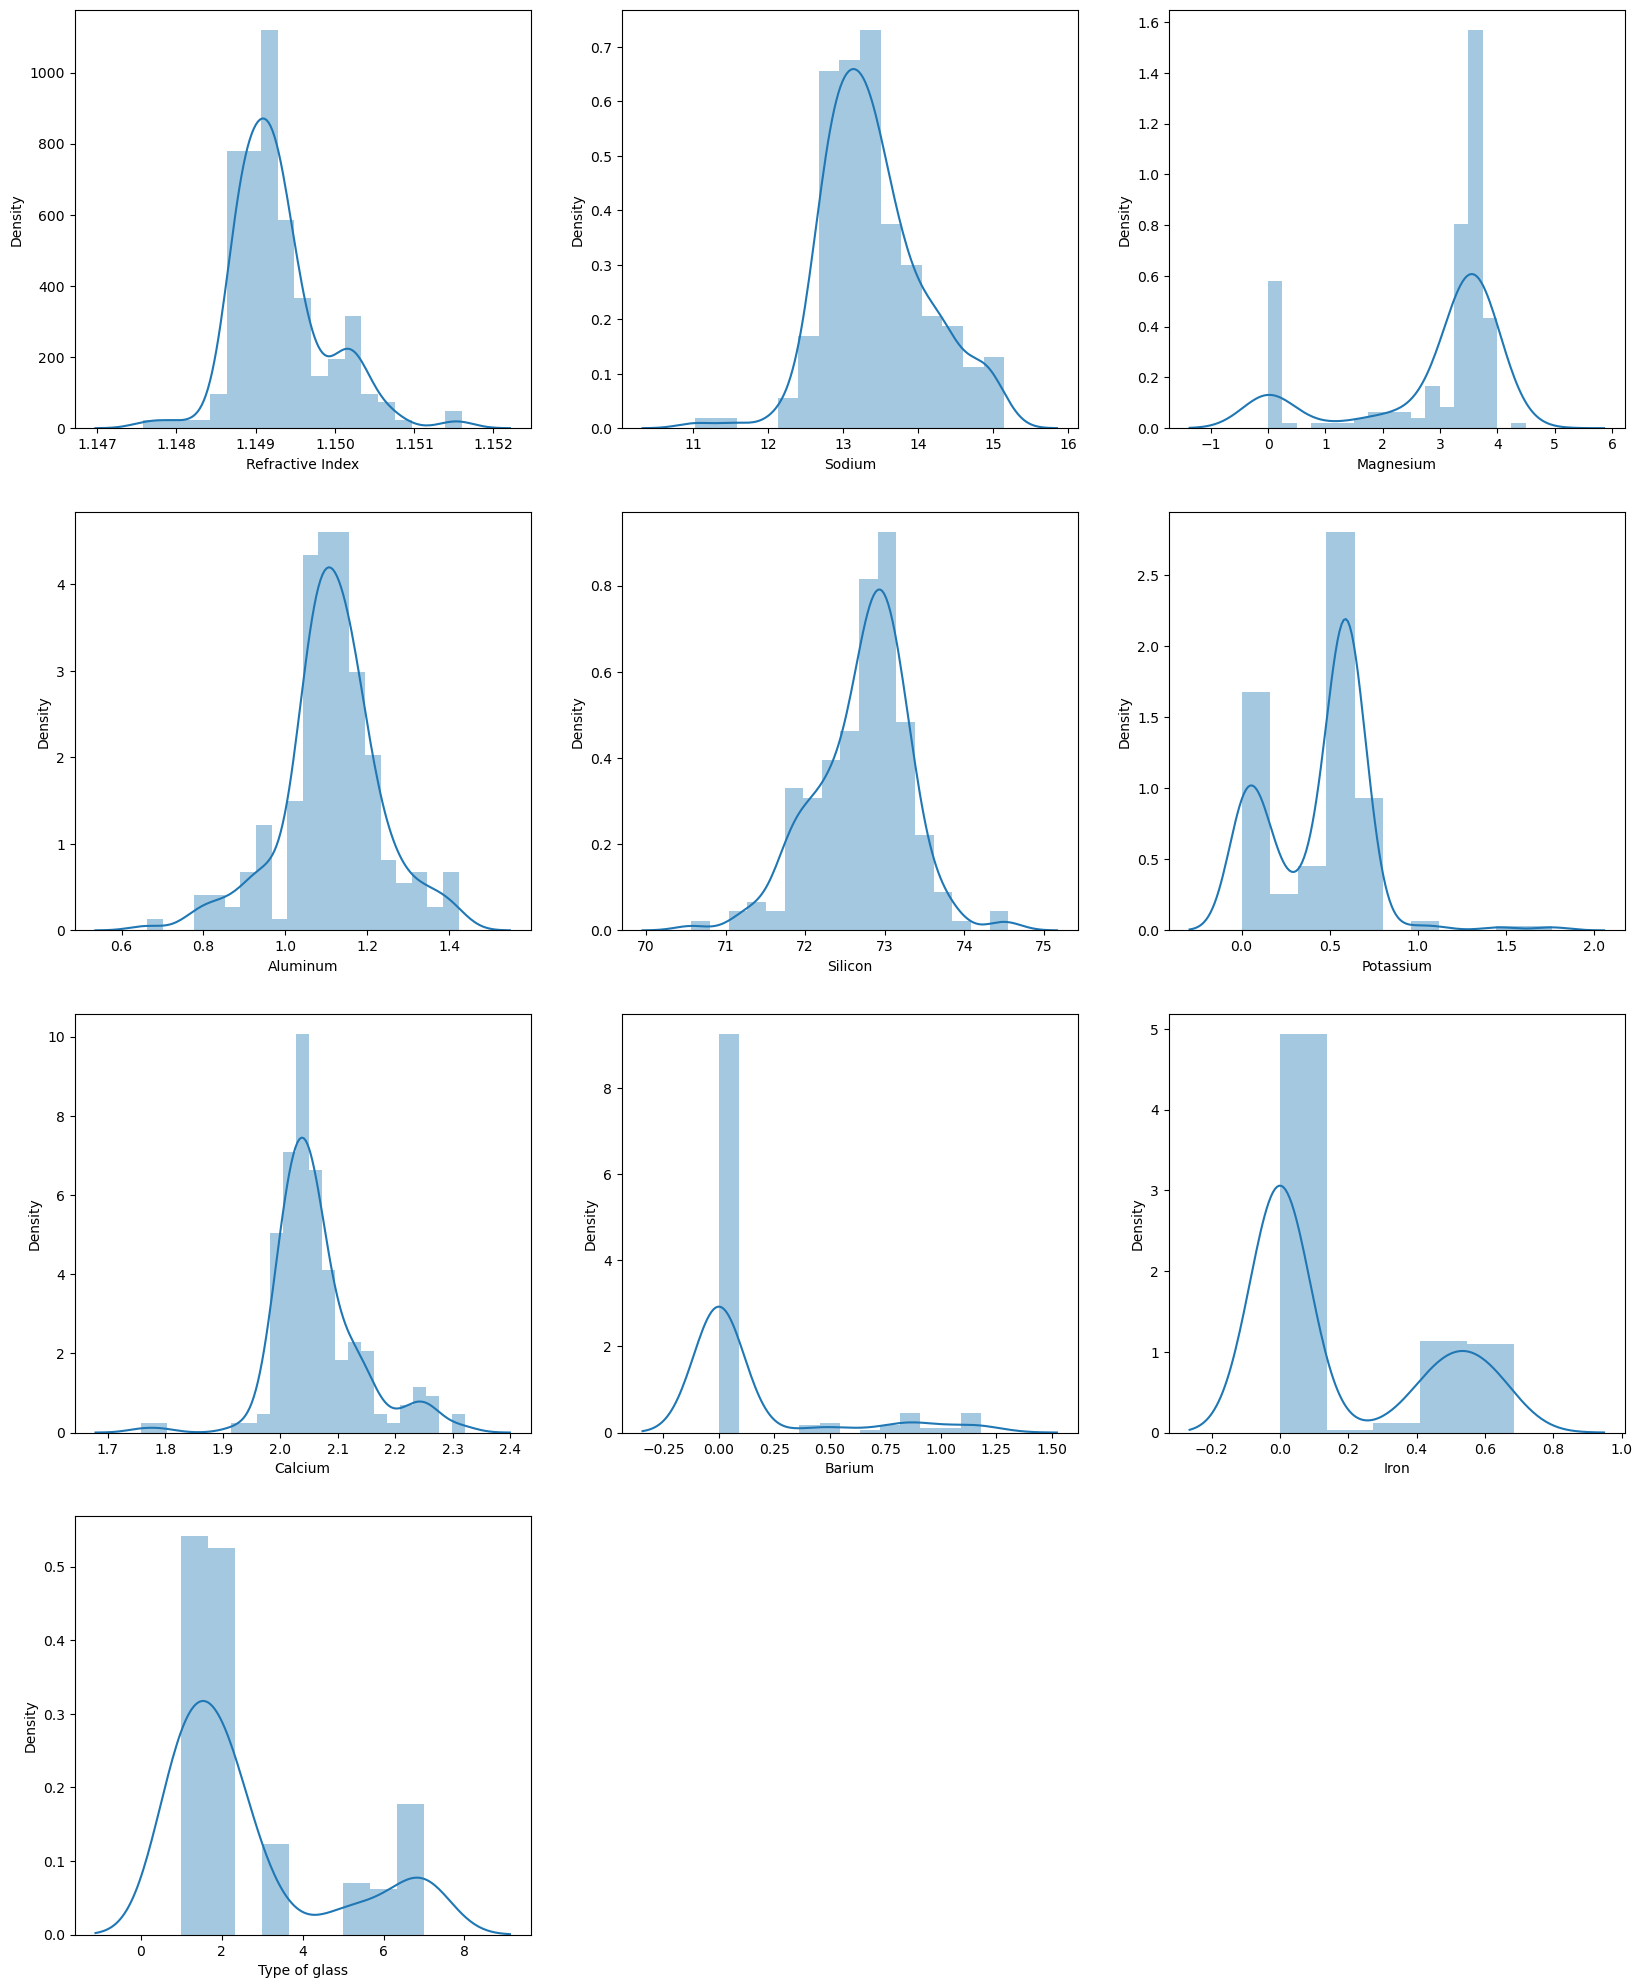

In [25]:
# Again plotting distplot to check distribution of data
plt.figure(figsize =(20,25))
plotnumber =1

for column in df:
    if plotnumber <=10:
        plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

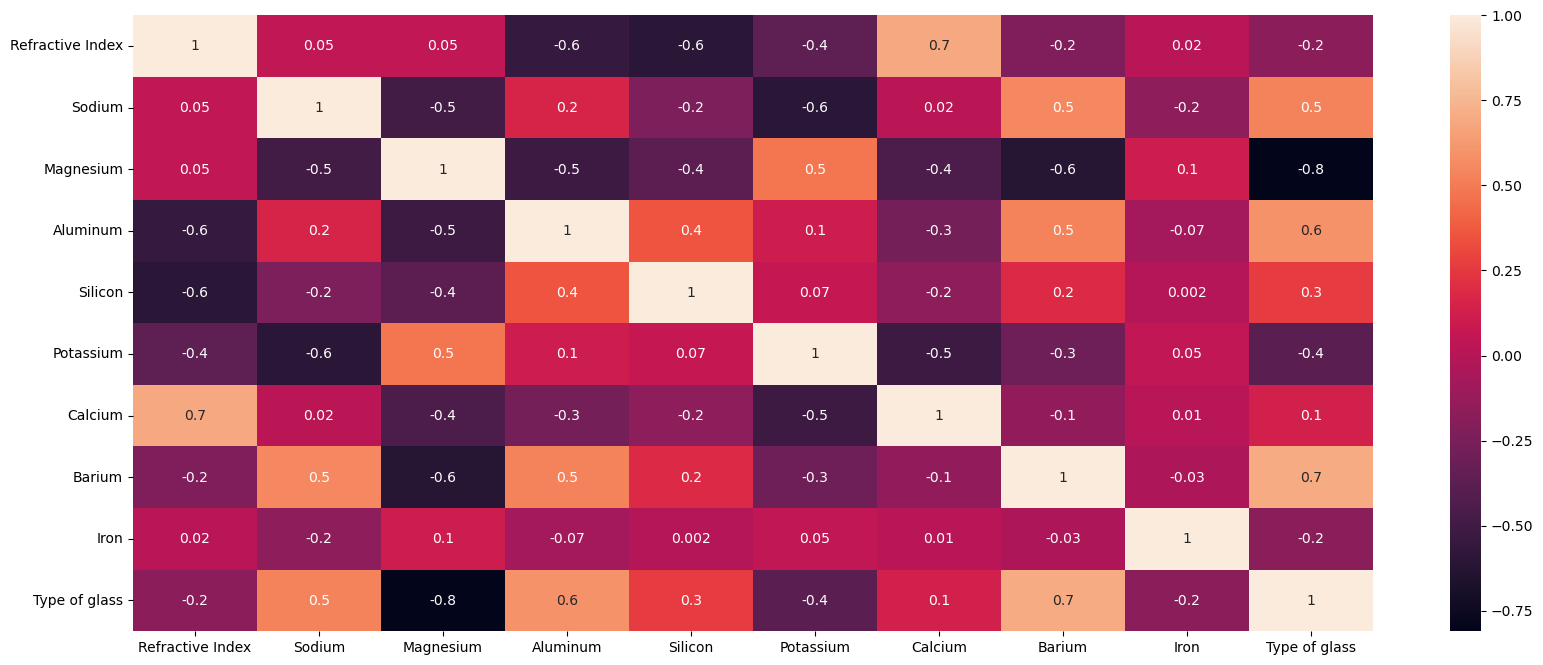

In [26]:
# Creating heatmap
plt.figure(figsize =(20, 8))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__No Multicollinearity observed__

In [27]:
#Dividing the data into Features and Label

x =df.drop(columns =['Type of glass'])
y =df[['Type of glass']]

In [28]:
# Standardization of data using Standard Scaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)

In [29]:
x

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.292056,0.332127,1.233397,-0.666678,-1.612464,-1.319609,-0.041137,-0.415308,-0.67803
1,-0.197444,0.704398,0.551581,-0.035036,0.016082,0.172091,-1.038165,-0.415308,-0.67803
2,-0.824575,0.168328,0.513277,0.356287,0.461790,-0.147559,-1.094542,-0.415308,-0.67803
3,-0.175524,-0.308179,0.620529,-0.196550,-0.189629,0.491741,-0.606457,-0.415308,-0.67803
4,-0.280746,-0.218834,0.566903,-0.315529,0.616073,0.420708,-0.770849,-0.415308,-0.67803
...,...,...,...,...,...,...,...,...,...
189,-0.728068,1.419158,-2.206325,2.397864,0.221793,-1.532708,0.671549,2.070338,-0.67803
190,-0.802641,1.076668,-2.206325,2.593556,-0.189629,-1.248575,0.400966,2.696958,-0.67803
191,-0.530695,2.238153,-2.206325,1.216416,0.581788,-1.532708,-0.411806,3.147347,-0.67803
192,1.134449,1.404267,-2.206325,1.268927,1.198921,-1.532708,-0.368929,3.184306,-0.67803


In [30]:
# Balancing dataset

SM =SMOTE()
x1, y1 =SM.fit_resample(x, y)

In [31]:
# Checking Shape of features and labels
print("Shape of features :", x1.shape)
print("Shape of label :", y1.shape)

Shape of features : (420, 9)
Shape of label : (420, 1)


In [32]:
# Checking value count of label after balancing dataset
y1.value_counts()

Type of glass
1                70
2                70
3                70
5                70
6                70
7                70
Name: count, dtype: int64

### Model Building

In [33]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x1, y1, test_size =0.30, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc,"at random_state :", maxrs)

Maximum accuracy is : 0.9523809523809523 at random_state : 23


In [34]:
RFR =RandomForestClassifier()
ETC =ExtraTreesClassifier()
LR =LogisticRegression()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTC =DecisionTreeClassifier()

In [35]:
models ={'RandomForestClassifier': RFR,
        'ExtraTreesClassifier': ETC,
        'LogisticRegression': LR,
        'SVC': svc,
        'GradientBoostigClassifier': GBC,
        'AdaBoostClassifier': ABC,
        'BaggingClassifier': BC,
        'DecisionTreeClassifier': DTC}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print(name)
    print("Accuracy Score: ", acc*100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report :\n", classification_report(y_test, pred))
    
    print("\nCross Validation :")
    print("*"*20)
    score =cross_val_score(model, x1, y1)
    print(score)
    print(score.mean())
    print("Difference between accuracy score and cross validation is :", (acc-(score.mean()))*100)
    print('\n')
    print("="*50)
    print('\n')

RandomForestClassifier
Accuracy Score:  92.85714285714286
Confusion Matrix:
 [[19  1  3  0  0  0]
 [ 2 19  1  0  0  0]
 [ 2  0 16  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 27]]
Classification Report :
               precision    recall  f1-score   support

           1       0.83      0.83      0.83        23
           2       0.95      0.86      0.90        22
           3       0.80      0.89      0.84        18
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        27

    accuracy                           0.93       126
   macro avg       0.93      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126


Cross Validation :
********************
[0.88095238 0.83333333 0.9047619  0.80952381 0.91666667]
0.8690476190476192
Difference between accuracy score and cross validation is : 5.952380952380942




ExtraTreesClassifier
Accuracy

__Based on all the above model performance, RandomForestClassifier is the best model giving highest accuracy of 86.90 after cross validation__

### Hyperparameter tunning

In [36]:
parameter ={'n_estimators': [25, 50, 100, 150, 175],
           'max_features': ['sqrt', 'log2', None],
           'max_depth': [3, 6, 8, 12],
           'max_leaf_nodes':[3, 6, 8, 12]
           }

In [39]:
GCV =GridSearchCV(RandomForestClassifier(), parameter, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 8, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 8, 12],
                         'n_estimators': [25, 50, 100, 150, 175]})

In [40]:
GCV.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 12,
 'n_estimators': 150}

In [41]:
Final_model=RandomForestClassifier(max_depth =8, max_features ='log2', max_leaf_nodes =12, n_estimators =150)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Model Accuracy is :", acc*100)

Model Accuracy is : 88.09523809523809


__Model accuracy improved from 86.90 to 88.09 after hyperparameter tunning

In [42]:
# Saving the model
pickle.dump(Final_model, open('Glass_Identification.pkl', 'wb'))

In [45]:
# Loading the model
loaded_model =pickle.load(open('Glass_Identification.pkl', 'rb'))
pred =Final_model.predict(x_test)
result =accuracy_score(y_test, pred)
print(result*100)
print(pred)

88.09523809523809
[1 7 7 6 5 5 1 3 1 7 5 1 1 1 1 5 6 1 6 1 1 5 7 7 2 2 3 1 3 6 7 7 3 5 7 6 5
 3 1 7 3 3 7 5 6 2 1 3 5 3 7 7 7 7 6 1 3 7 7 1 1 3 6 2 6 3 1 7 5 7 7 3 6 5
 1 6 5 3 6 6 2 1 1 2 1 6 1 1 5 1 7 6 3 7 2 2 7 2 2 5 5 6 2 6 6 3 3 7 2 2 3
 1 7 2 6 7 5 7 1 6 1 2 7 6 3 1]


In [46]:
#Comparing actual vs predicted
test =np.array(pred)
df =pd.DataFrame()
df['Actual'] =test
df['Predicted'] =pred
df

,Actual,Predicted
0,1,1
1,7,7
2,7,7
3,6,6
4,5,5
...,...,...
121,2,2
122,7,7
123,6,6
124,3,3
